<span style="font-size: 16px;"><b>Model 1: single stock regression</b></span>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas_datareader.data as web
import numpy as np
import pandas as pd

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_prices(symbol):  # extract data from yahoo finance (daily close price)
    start, end = '2007-05-02', '2018-12-01'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Close']
    prices=prices.astype(float)
    return prices

def get_returns(prices):  # calculate daily return of stock
    return (prices-prices.shift(-1))/prices

def sort_data(rets):  # divide return into training set and testing set
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)

In [3]:
# separate data into inputs and outputs for training and testing
gs = get_prices('GS')
rets = get_returns(gs)
ins, outs = sort_data(rets)
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]

In [4]:
print(test_ins)

[[-0.00315418 -0.02282725 -0.02662159 ... -0.00397601 -0.00088668
  -0.00200789]
 [-0.02282725 -0.02662159  0.00994124 ... -0.00088668 -0.00200789
  -0.01172868]
 [-0.02662159  0.00994124 -0.00864985 ... -0.00200789 -0.01172868
   0.01800068]
 ...
 [ 0.00500022  0.00524577 -0.00691304 ... -0.02771015  0.00355049
  -0.02427066]
 [ 0.00524577 -0.00691304  0.00356482 ...  0.00355049 -0.02427066
   0.01764558]
 [-0.00691304  0.00356482 -0.02221633 ... -0.02427066  0.01764558
   0.02134977]]


In [5]:
sess = tf.InteractiveSession()

In [6]:
# we define two placeholders for our input and output
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

# we define trainable variables for our model
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

# we define our model: y = W*x + b
y = tf.matmul(x, W) + b

#MSE loss with gradient descent
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

In [7]:
# initialize variables to random values
init = tf.global_variables_initializer()
sess.run(init)
# run optimizer on entire training data set many times
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
    # every 1000 iterations record progress
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.016699834
Epoch: 2000 cost= 0.004796334
Epoch: 3000 cost= 0.001918017
Epoch: 4000 cost= 0.001101598
Epoch: 5000 cost= 0.000842548
Epoch: 6000 cost= 0.000753099
Epoch: 7000 cost= 0.000720097
Epoch: 8000 cost= 0.000707259
Epoch: 9000 cost= 0.000702051
Epoch: 10000 cost= 0.000699867
Epoch: 11000 cost= 0.000698926
Epoch: 12000 cost= 0.000698513
Epoch: 13000 cost= 0.000698329
Epoch: 14000 cost= 0.000698246
Epoch: 15000 cost= 0.000698208
Epoch: 16000 cost= 0.000698190
Epoch: 17000 cost= 0.000698182
Epoch: 18000 cost= 0.000698178
Epoch: 19000 cost= 0.000698177
Epoch: 20000 cost= 0.000698176


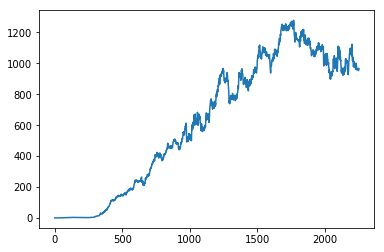

In [8]:
#train results :)
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * train_outs
plt.plot(np.cumprod(returns+1))

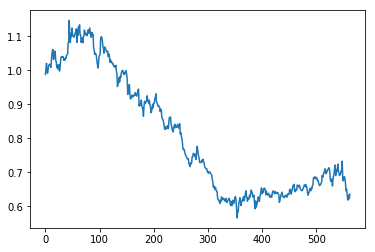

In [9]:
#test results :(
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * test_outs
plt.plot(np.cumprod(returns+1))